In prior posts we have used the IPython machinery to modify the default display representations.  This notebook tries to acheive the same goal while use more `IPython` machinery.

In [1]:
import IPython, traitlets, fnmatch, vdom.svg as vdom, graphviz; ip = IPython.get_ipython()

`ip.display_formatter.mimebundle_formatter` is called prior to the other formatters.  Those formatters extract important includede keys from the formatter

In [2]:
assert ip.display_formatter.formatters['text/plain'](range)
assert ip.display_formatter.formatters['text/html'](range) is None

In this demonstration we create `vdom.iframe`s to `embed` links and diagrams with `graphviz`.

In [3]:
def embed(str): return vdom.iframe(src=str, style={
    'width': '100%', 'height': '500px'})
def graphviz(str): 
    import graphviz
    return graphviz.Source(str)

`StringFormatter` is a custom `IPython.core.formatters.MimeBundleFormatter` that adds special logic for `str` types.  The `StringFormatter.formatters` are configurable for different `str` logic.

In [4]:
class StringFormatter(IPython.core.formatters.MimeBundleFormatter):
    formatters = traitlets.Dict()
    @traitlets.default('formatters')
    def _default_formatters(self):return {
        'https://*' : embed,
        'http://*' : embed,
        'graph {*}': graphviz, 
        'digraph {*}': graphviz}

        
    def __call__(self, object, include=None, exclude=None):
        if isinstance(object, str):
            for type, callable in self.formatters.items():
                if fnmatch.fnmatch(object, type):
                    return ip.display_formatter.format(callable(object))
        return super().__call__(
            object, list(ip.display_formatter.formatters), exclude)
IPython.core.formatters.FormatterABC.register(StringFormatter);

* The `IPython` extensions.

In [5]:
def load_ipython_extension(ip=None): (
    ip or IPython.get_ipython()
).display_formatter.mimebundle_formatter = StringFormatter(parent=ip)
if __name__ == '__main__':
    load_ipython_extension()

In [6]:
def unload_ipython_extension(ip=None):
    (ip or IPython.get_ipython()).display_formatter.mimebundle_formatter = IPython.core.formatters.MimeBundleFormatter()

* Demonstrations

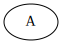

In [7]:
"graph {A}"

In [8]:
"http://nbviewer.jupyter.org/github/deathbeds/deathbeds.github.io/tree/master/deathbeds/"

'http://nbviewer.jupyter.org/github/deathbeds/deathbeds.github.io/tree/master/deathbeds/'